In [4]:
import datetime 

import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh
import folium 
import geopandas as gpd 
current_file_path = os.path.abspath(os.getcwd())
parent_dir = os.path.abspath(os.path.join(current_file_path, '..','..','..'))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

from load_inputs.systematic_analysis.load_subway import load_dataset
from load_inputs.systematic_analysis.utils import get_histogram_per_day_type,get_boxplot_per_spatial_unit_per_day_type,heatmap
from load_inputs.systematic_analysis.utils import IN_bdc,OUT_bdc,IN_nbdc,OUT_nbdc


city = 'Lyon'

for signal in ['in','out']: # ['in','out']:
    ds, df_raw, df =  load_dataset(f"subway_{signal}")
    df_raw.columns.name = 'Spatial Unit ID'
    palette = [IN_bdc, IN_nbdc] if signal == 'in' else [OUT_bdc, OUT_nbdc]

    globals()[f'ds_{signal}'] = ds
    globals()[f'df_raw_{signal}'] = df_raw
    globals()[f'df_{signal}'] = df
    globals()[f'palette_{signal}'] =  palette
df_raw.head()

   Load data from: //home/rrochas/../../data/rrochas/prediction_validation/subway_in/subway_in.csv
   Load data from: //home/rrochas/../../data/rrochas/prediction_validation/subway_out/subway_out.csv


Spatial Unit ID,AMP,BEL,BRO,CHA,COR,CPA,CRO,CUI,CUS,DEB,...,PAR,PER,GUI,JAU,REP,SAN,SAX,GER,VMY,JEA
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,4.0,25.0,2.0,36.0,8.0,0.0,12.0,9.0,9.0,11.0,...,30.0,16.0,12.0,12.0,16.0,18.0,8.5,12.0,25.0,4.666667
2019-01-01 00:15:00,2.0,14.0,3.0,411.0,4.0,0.0,8.0,3.0,21.0,15.0,...,16.0,37.0,6.0,15.0,10.0,22.0,23.0,7.0,11.0,1.666667
2019-01-01 00:30:00,7.0,18.0,2.0,209.5,10.0,4.0,8.0,7.0,13.0,8.0,...,18.0,6.0,8.0,17.0,7.0,14.0,22.0,3.0,25.0,3.666667
2019-01-01 00:45:00,9.0,11.0,6.0,452.0,6.0,2.0,15.0,10.0,9.0,8.0,...,0.0,33.0,0.0,9.0,11.0,10.0,11.0,4.0,2.0,4.333333
2019-01-01 01:00:00,0.0,0.0,0.0,336.0,0.0,0.0,0.0,0.0,6.0,0.0,...,2.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,6.0,0.000000


# Histogramme des volumes agrégée 15 min en business day / non business day

Number of remaining time-slots after filtering 24096
Number of remaining time-slots after filtering 10944


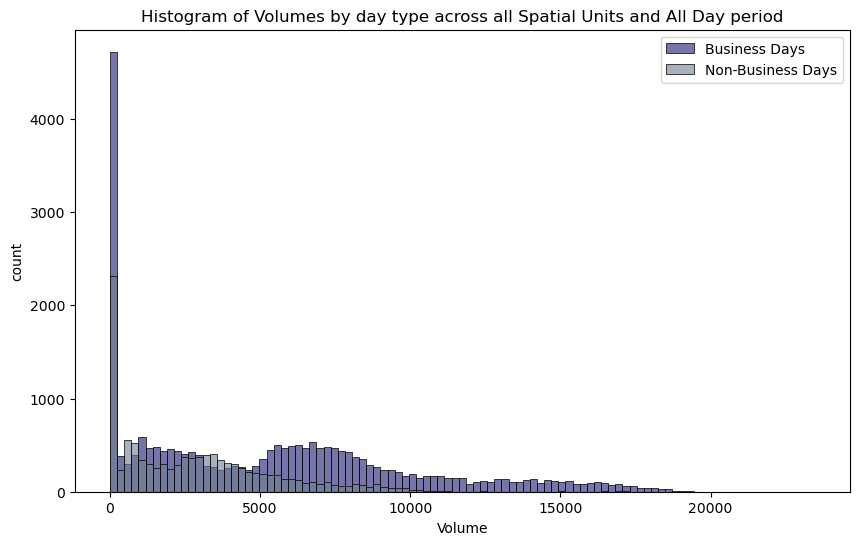

Number of remaining time-slots after filtering 3263
Number of remaining time-slots after filtering 1482


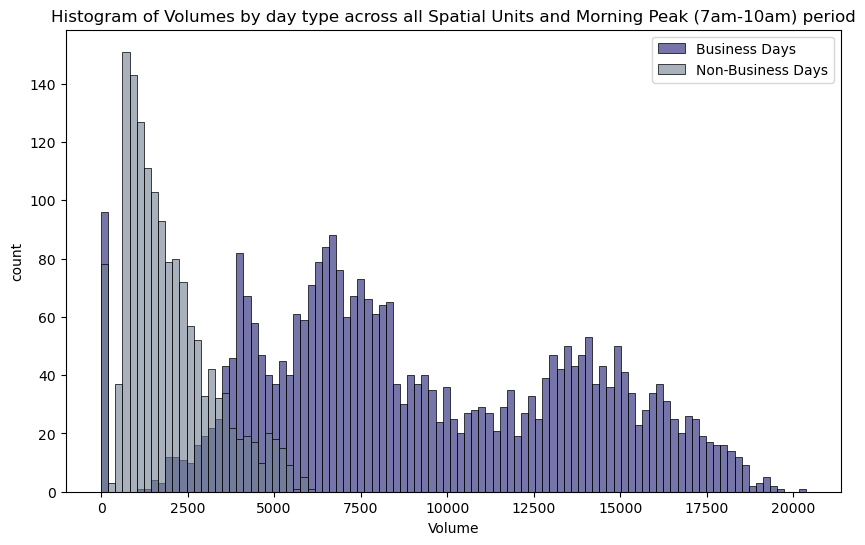

Number of remaining time-slots after filtering 2761
Number of remaining time-slots after filtering 1254


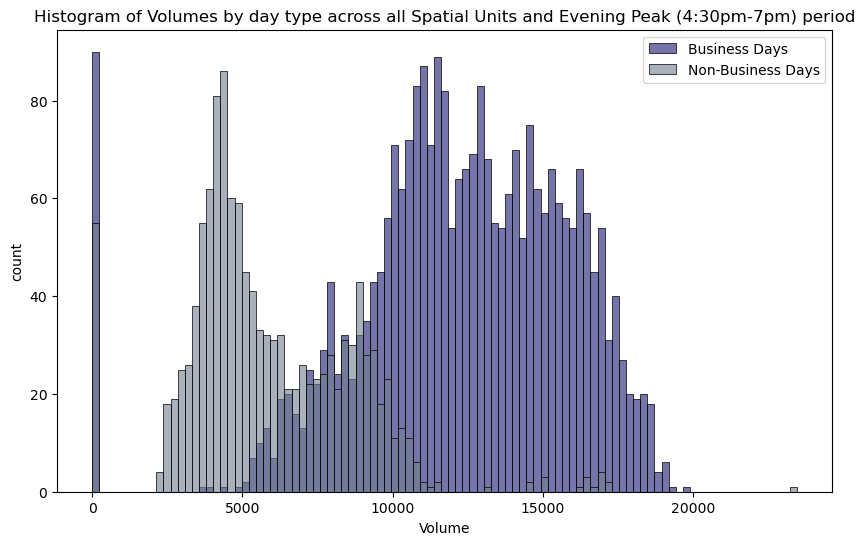

Number of remaining time-slots after filtering 24096
Number of remaining time-slots after filtering 10944


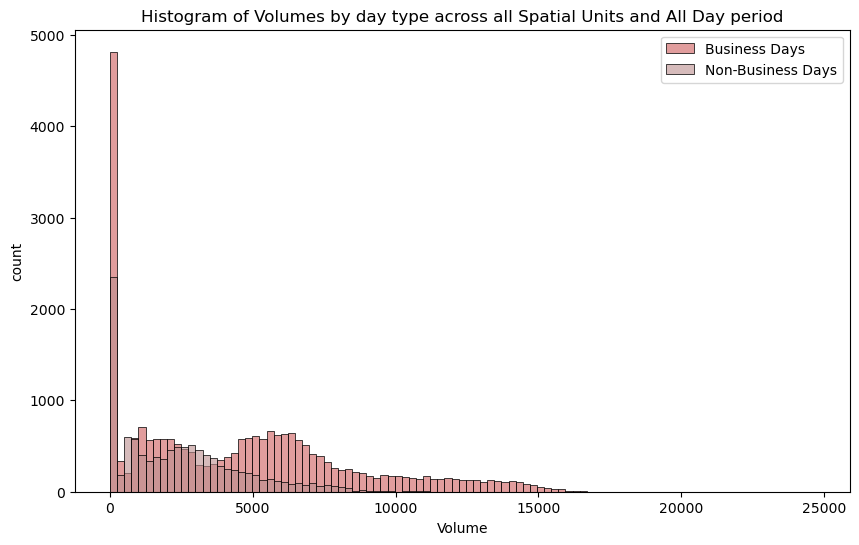

Number of remaining time-slots after filtering 3263
Number of remaining time-slots after filtering 1482


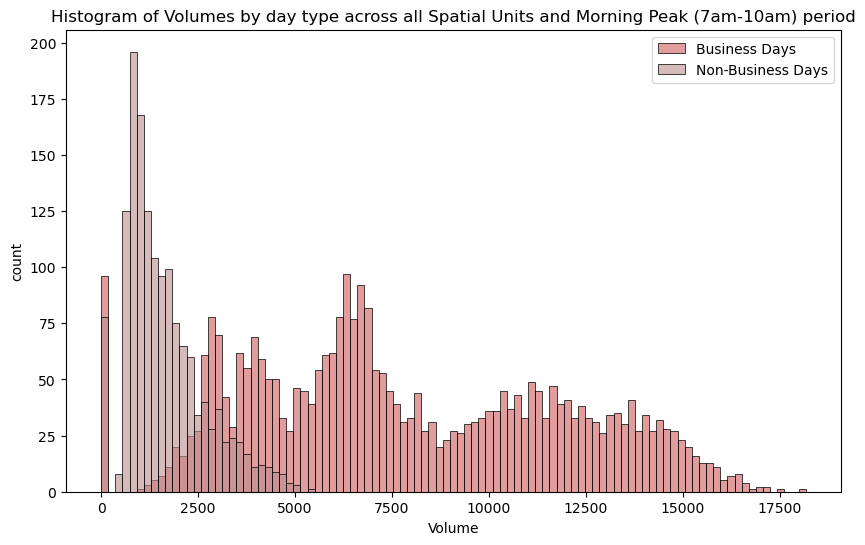

Number of remaining time-slots after filtering 2761
Number of remaining time-slots after filtering 1254


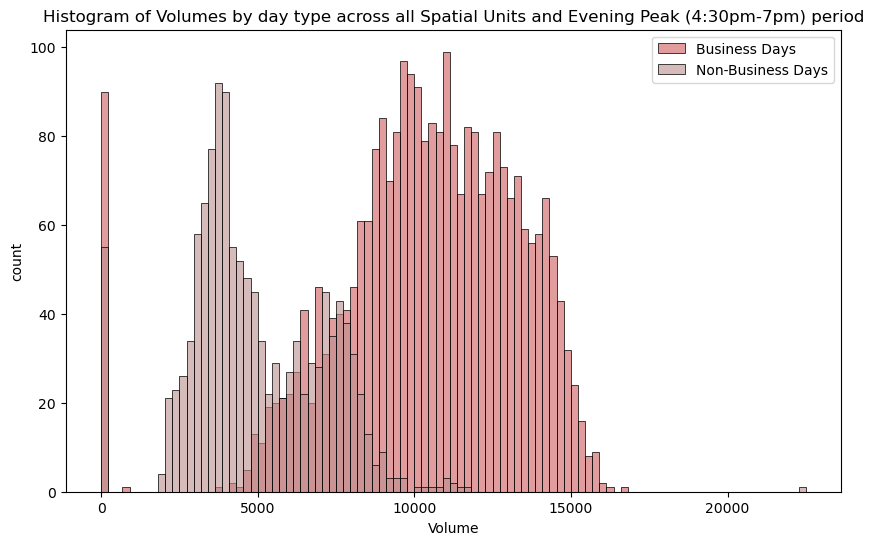

In [5]:
# from utils import get_histogram_per_day_type
stats = 'count'
# ts_bd, ts_nbd = get_histogram_per_day_type(df_raw,city= city,period = 'all_day',stats = stats, palette = [IN_bdc, IN_nbdc])
for signal in ['in','out']:
    df_raw = globals()[f'df_raw_{signal}']
    palette = globals()[f'palette_{signal}']
    for period in ['all_day','morning_peak','evening_peak']:
        folder = f"{os.getcwd()}/load_inputs/systematic_analysis/plots/subway_hist"
        save_path = f'{folder}/subway_hist_{signal}_{period}.pdf'# None 
        ts_bd, ts_nbd = get_histogram_per_day_type(df_raw,city= city,period = period,stats = stats, palette = palette,n_bins = 100,save_path= save_path)
        # ts_bd, ts_nbd = get_histogram_per_day_type(df_raw,city= city,period = 'evening_peak',stats = stats, palette = [IN_bdc, IN_nbdc])

# Boxplot des volumes par station en business days / non business days:

Number of remaining time-slots after filtering 24096
Number of remaining time-slots after filtering 10944


/home/rrochas/prediction-validation/load_inputs/systematic_analysis/utils.py:337: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_q = df_combined.groupby(['Spatial Unit ID', 'day_type'])['Volume'].agg(
/home/rrochas/prediction-validation/load_inputs/systematic_analysis/utils.py:347: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_max = df_combined.groupby(['Spatial Unit ID', 'day_type'])['Volume'].max().reset_index()


<Figure size 1200x600 with 0 Axes>

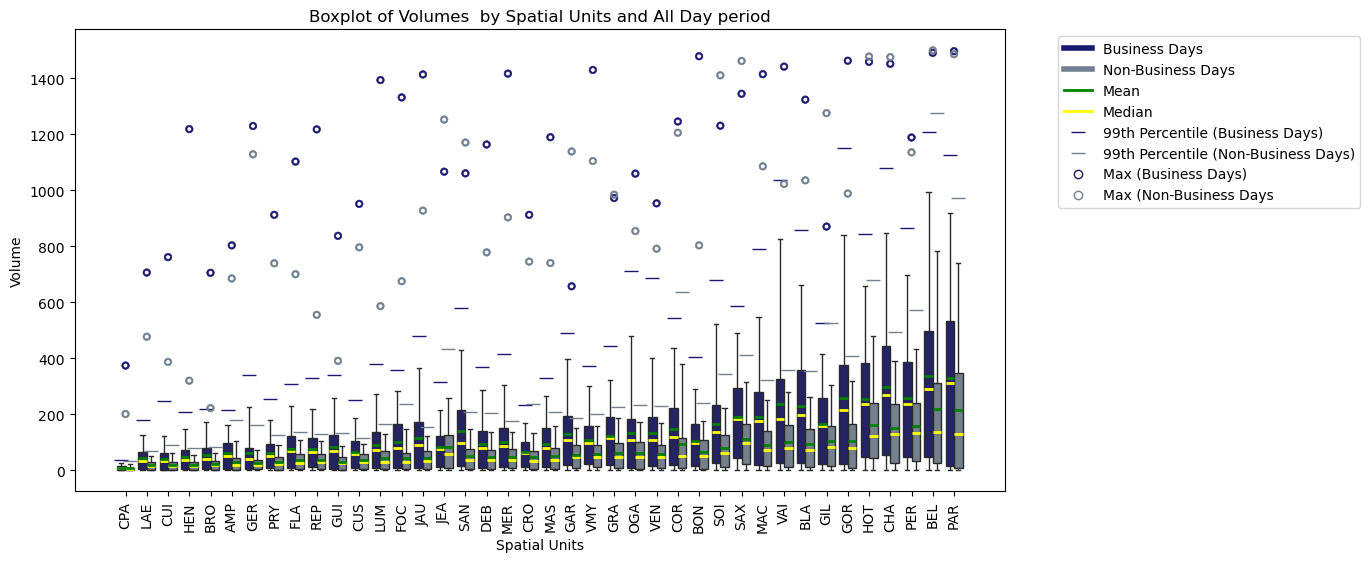

Number of remaining time-slots after filtering 3263
Number of remaining time-slots after filtering 1482


/home/rrochas/prediction-validation/load_inputs/systematic_analysis/utils.py:337: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_q = df_combined.groupby(['Spatial Unit ID', 'day_type'])['Volume'].agg(
/home/rrochas/prediction-validation/load_inputs/systematic_analysis/utils.py:347: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_max = df_combined.groupby(['Spatial Unit ID', 'day_type'])['Volume'].max().reset_index()


<Figure size 1200x600 with 0 Axes>

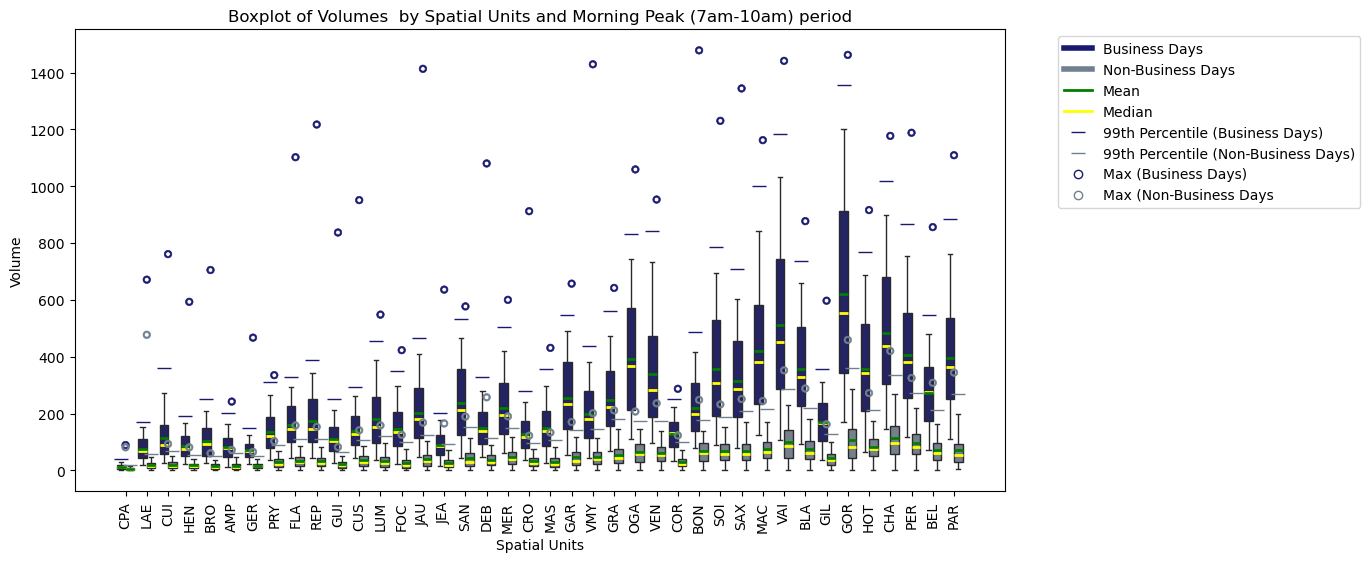

Number of remaining time-slots after filtering 2761
Number of remaining time-slots after filtering 1254


/home/rrochas/prediction-validation/load_inputs/systematic_analysis/utils.py:337: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_q = df_combined.groupby(['Spatial Unit ID', 'day_type'])['Volume'].agg(
/home/rrochas/prediction-validation/load_inputs/systematic_analysis/utils.py:347: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_max = df_combined.groupby(['Spatial Unit ID', 'day_type'])['Volume'].max().reset_index()


<Figure size 1200x600 with 0 Axes>

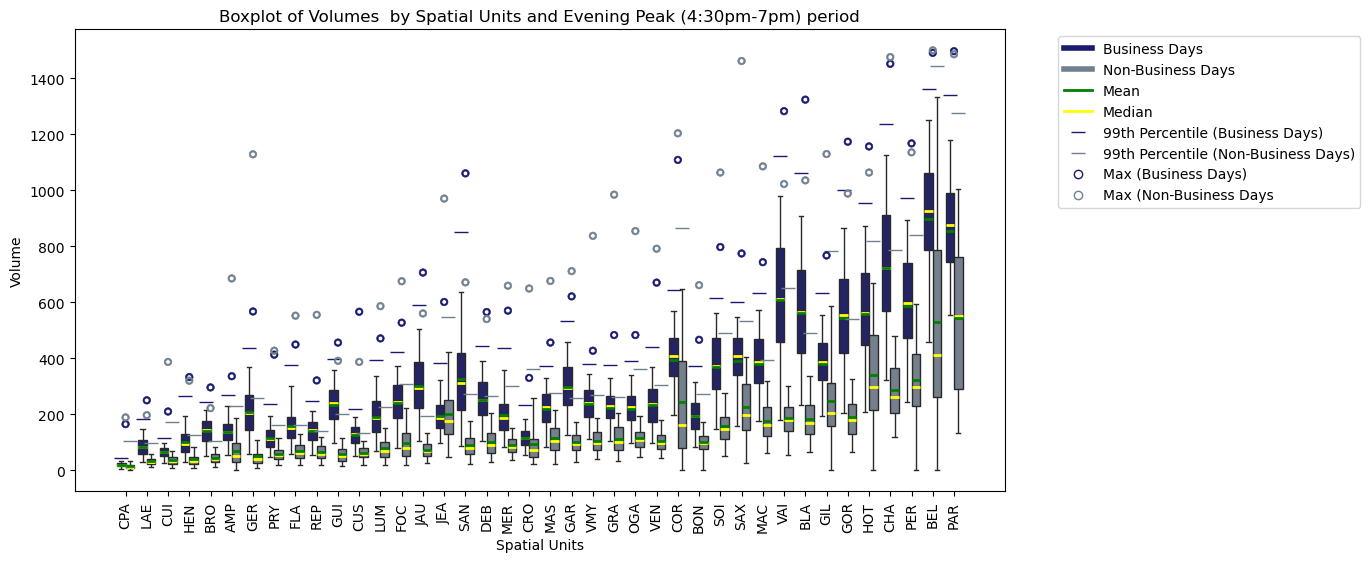

Number of remaining time-slots after filtering 24096
Number of remaining time-slots after filtering 10944


/home/rrochas/prediction-validation/load_inputs/systematic_analysis/utils.py:337: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_q = df_combined.groupby(['Spatial Unit ID', 'day_type'])['Volume'].agg(
/home/rrochas/prediction-validation/load_inputs/systematic_analysis/utils.py:347: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_max = df_combined.groupby(['Spatial Unit ID', 'day_type'])['Volume'].max().reset_index()


<Figure size 1200x600 with 0 Axes>

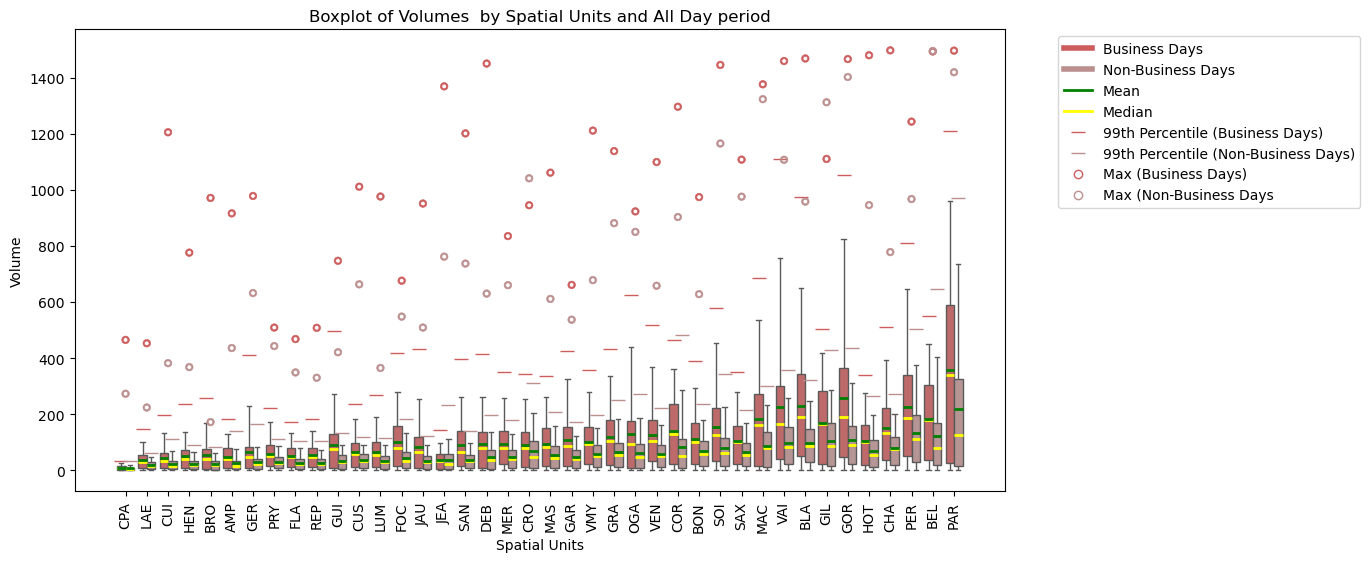

Number of remaining time-slots after filtering 3263
Number of remaining time-slots after filtering 1482


/home/rrochas/prediction-validation/load_inputs/systematic_analysis/utils.py:337: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_q = df_combined.groupby(['Spatial Unit ID', 'day_type'])['Volume'].agg(
/home/rrochas/prediction-validation/load_inputs/systematic_analysis/utils.py:347: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_max = df_combined.groupby(['Spatial Unit ID', 'day_type'])['Volume'].max().reset_index()


<Figure size 1200x600 with 0 Axes>

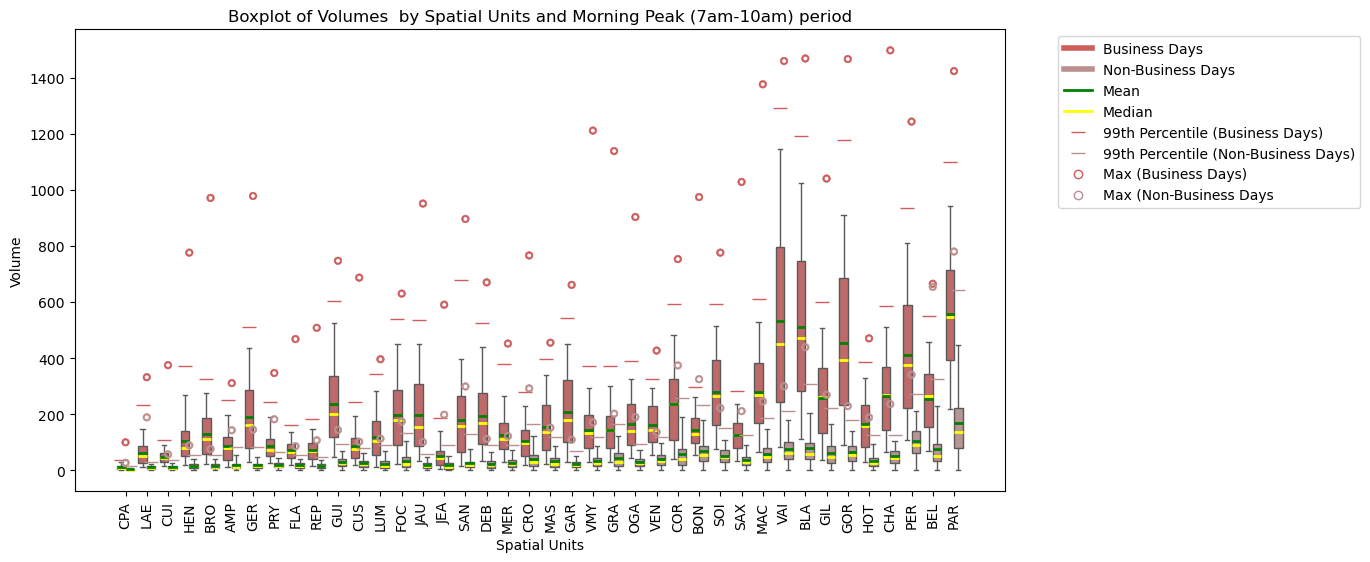

Number of remaining time-slots after filtering 2761
Number of remaining time-slots after filtering 1254


/home/rrochas/prediction-validation/load_inputs/systematic_analysis/utils.py:337: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_q = df_combined.groupby(['Spatial Unit ID', 'day_type'])['Volume'].agg(
/home/rrochas/prediction-validation/load_inputs/systematic_analysis/utils.py:347: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_max = df_combined.groupby(['Spatial Unit ID', 'day_type'])['Volume'].max().reset_index()


<Figure size 1200x600 with 0 Axes>

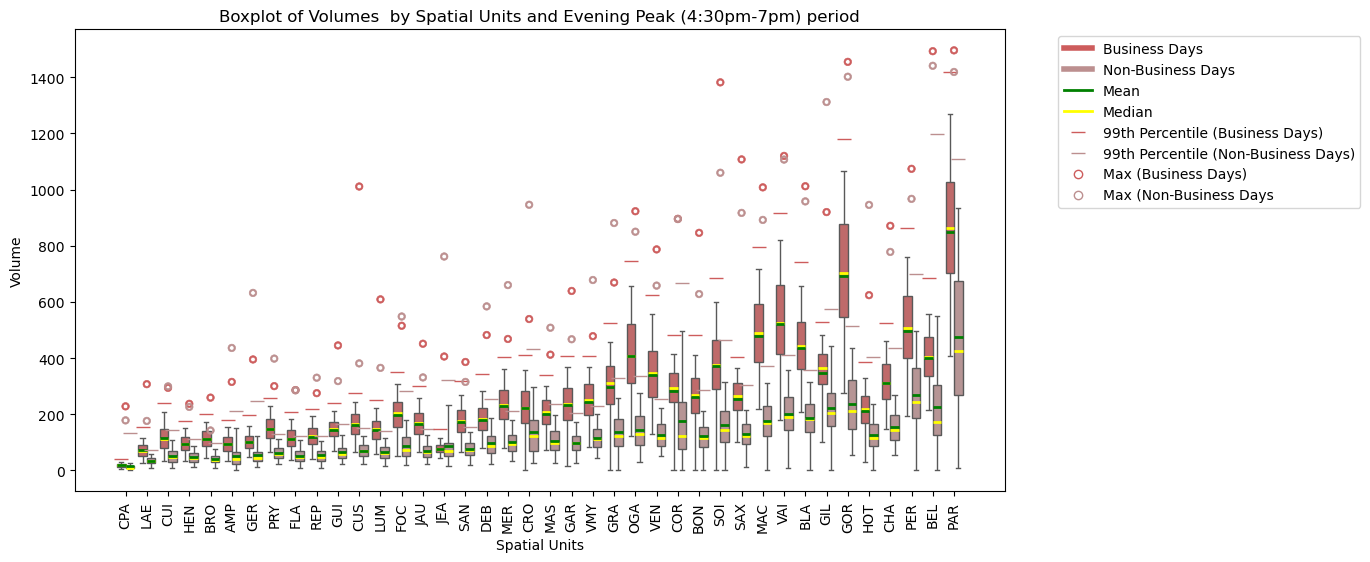

In [6]:
# # from utils import get_boxplot_per_spatial_unit_per_day_type

df_all = df_raw_in + df_raw_out
for signal in ['in','out']:
    df_raw = globals()[f'df_raw_{signal}']
    palette = globals()[f'palette_{signal}']
    for period in ['all_day','morning_peak','evening_peak']:
        folder = f"{os.getcwd()}/load_inputs/systematic_analysis/plots/subway_boxplot"
        save_path = f'{folder}/subway_boxplot_{signal}_{period}.pdf'# None
        df_bd, df_nbd = get_boxplot_per_spatial_unit_per_day_type(df_raw,period = period,city= city, palette = palette,save_path = save_path,df_all = df_all)

# df_bd, df_nbd = get_boxplot_per_spatial_unit_per_day_type(df_raw,period = 'all_day',city= city, palette = palette)
# df_bd, df_nbd = get_boxplot_per_spatial_unit_per_day_type(df_raw,period = 'morning_peak',city= city, palette = palette)
# df_bd, df_nbd = get_boxplot_per_spatial_unit_per_day_type(df_raw,period = 'evening_peak',city= city, palette = palette)


# # normalize df_raw:
# df_bd, df_nbd = get_boxplot_per_spatial_unit_per_day_type(df_raw,period = 'all_day',city= city, palette = palette, norm=True,normtype='zscore')  
# df_bd, df_nbd = get_boxplot_per_spatial_unit_per_day_type(df_raw,period = 'morning_peak',city= city, palette = palette, norm=True,normtype='zscore')
# df_bd, df_nbd = get_boxplot_per_spatial_unit_per_day_type(df_raw,period = 'evening_peak',city= city, palette = palette, norm=True,normtype='zscore')


# # normalize anf filtered df_raw :
# df_bd, df_nbd = get_boxplot_per_spatial_unit_per_day_type(df_raw,period = 'all_day',city= city, palette = palette, norm=True,filter_q = 0.99,normtype='zscore')
# df_bd, df_nbd = get_boxplot_per_spatial_unit_per_day_type(df_raw,period = 'morning_peak',city= city, palette = palette, norm=True,filter_q = 0.99,normtype='zscore')
# df_bd, df_nbd = get_boxplot_per_spatial_unit_per_day_type(df_raw,period = 'evening_peak',city= city, palette = palette, norm=True,filter_q = 0.99,normtype='zscore')
# # --------------------------------------------------
# # Identification des particularités:


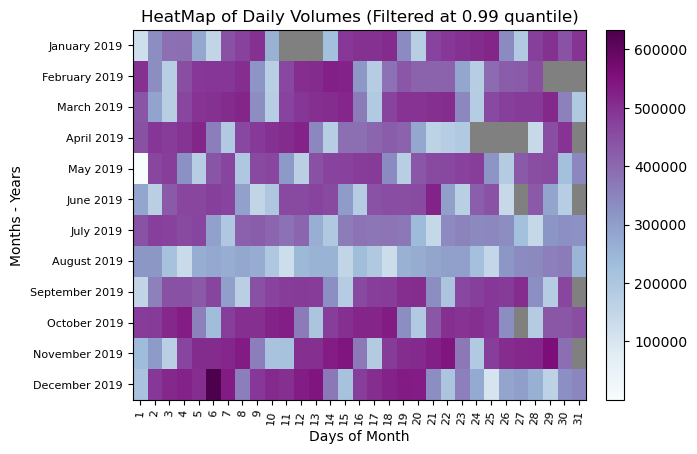

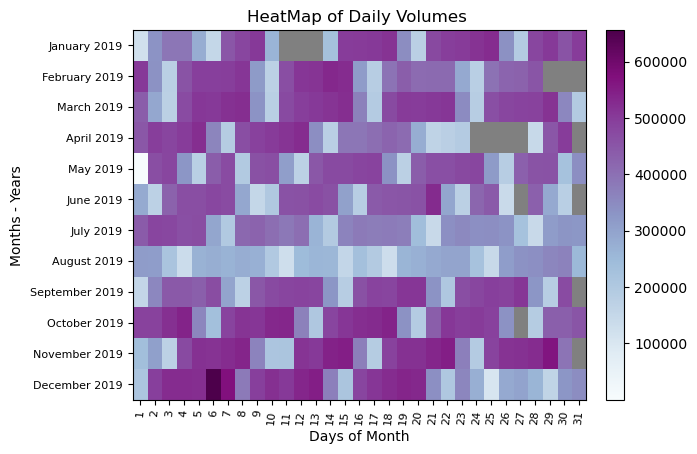

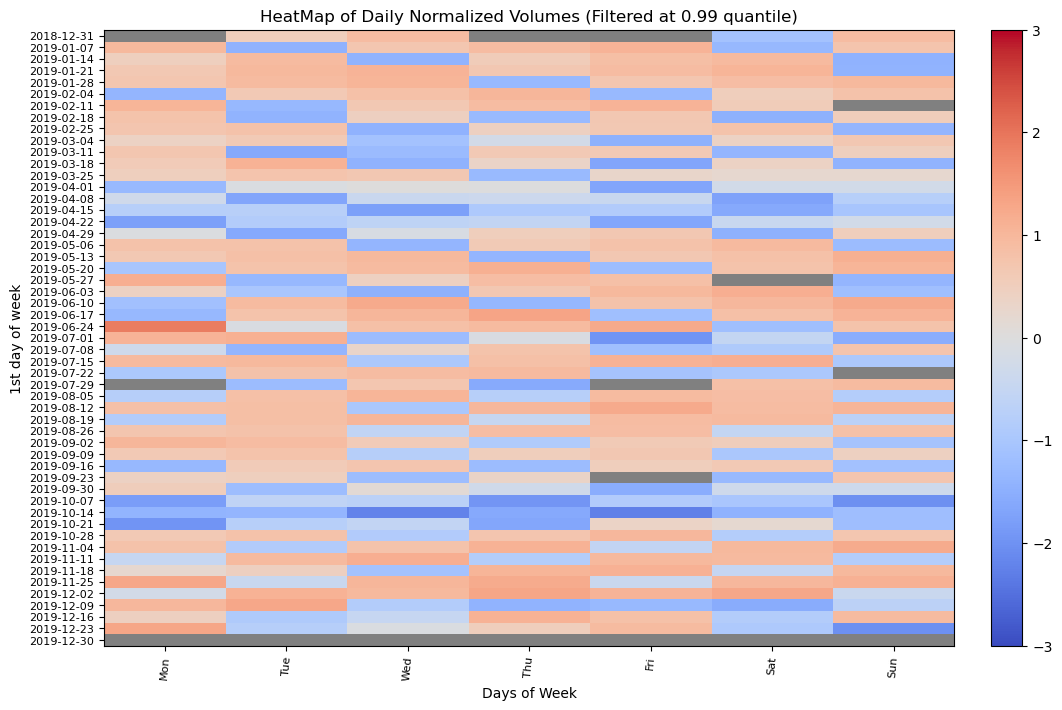

In [7]:
cmap = 'BuPu' # 'hot' #'YlOrRd' # 'RdYlBu'
bool_reversed= False 
filter_q = 0.99
folder = f"{os.getcwd()}/load_inputs/systematic_analysis/plots/subway_heatmap"

save_path = f'{folder}/subway_heatmap_{city}_q{filter_q}.pdf'# None
df_agg = heatmap(df_raw,city= city,filter_q = filter_q,cmap = cmap,bool_reversed = bool_reversed,
                 save_path = save_path )

save_path = f'{folder}/subway_heatmap_{city}.pdf'# None
df_agg = heatmap(df_raw,city= city,cmap = cmap,bool_reversed = bool_reversed,
                 save_path = save_path )

save_path = f'{folder}/subway_heatmap_{city}_standardize.pdf'# None
df_agg = heatmap(df_raw,city= city,filter_q = 0.99,norm = True,
                 cmap = 'coolwarm',bool_reversed = bool_reversed,
                 normalized_based_on= ('business_day','school_holidays'), # ,'weekday'
                 index = 'monday_date',
                 columns = 'day_of_week',
                 vmin = -3, vmax = 3,
                 figsize = (12,8),
                 save_path = save_path 
)

# Folium Map

In [9]:
# Open Json velov dataset 
import json
import pandas as pd
import folium
from branca.element import MacroElement,Template
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import LineString

from load_inputs.Lyon.pt.subway_in import get_trigram_correspondance

from load_inputs.systematic_analysis.utils import get_inflow_outflow


# Load Subway data
def load_subway_gdf(inflow,outflow,index_name):
    data_folder  = '../../../../../../data/rrochas/raw_data'
    subway_csv_path = 'keolis_data_2019-2020/ref_subway.csv'
    subway_lanes_path = 'keolis_data_2019-2020/metro_matching_TRI_FULL.CSV'
    df_subway = pd.read_csv(os.path.join(data_folder, subway_csv_path),index_col =0)
    subway_lanes = pd.read_csv(os.path.join(data_folder,subway_lanes_path),sep=';').rename(columns = {'LIGNE_A':'A', 'LIGNE_B':'B', 'LIGNE_C':'C', 'LIGNE_D':'D'})

    laneA =  ['PER','AMP','BEL', 'COR','HOT','FOC', 'MAS', 'CHA', 'REP','GRA','FLA','CUS', 'BON', 'SOI']
    laneB = ['CHA','BRO','PAR','GUI', 'SAX',  'MAC', 'JAU','DEB', 'GER','OGA' ]
    laneC = ['CUI', 'HEN','CRO','CPA','HOT']
    laneD = ['VAI','VMY','GOR','FOU', 'JEA','BEL',  'GIL',  'SAX','GAR','SAN', 'LUM','BLA', 'LAE', 'MER', 'PRY','VEN']

    df_subway_A = df_subway[df_subway['COD_TRG'].isin(laneA)].set_index('COD_TRG').reindex(laneA)
    df_subway_B = df_subway[df_subway['COD_TRG'].isin(laneB)].set_index('COD_TRG').reindex(laneB)
    df_subway_C = df_subway[df_subway['COD_TRG'].isin(laneC)].set_index('COD_TRG').reindex(laneC)
    df_subway_D = df_subway[df_subway['COD_TRG'].isin(laneD)].set_index('COD_TRG').reindex(laneD)
    df_correspondance = get_trigram_correspondance()

    gdf_subway_stations = gpd.GeoDataFrame()
    gdf_subway_lines = gpd.GeoDataFrame()
    for df_subway_i,lane_i in zip([df_subway_A,df_subway_B,df_subway_C,df_subway_D],['A','B','C','D']):
        df_subway_i.loc[:,'geometry'] = df_subway_i.apply(lambda row: Point(row['MEAN_X'],row['MEAN_Y']), axis=1)
        df_subway_i.loc[:,'lane'] = lane_i
        Linestring_i = LineString(df_subway_i['geometry'].tolist())
        gdf_subway_stations = pd.concat([gdf_subway_stations, gpd.GeoDataFrame(df_subway_i, geometry='geometry', crs='EPSG:4326')], ignore_index=True)
        gdf_subway_lines = pd.concat([gdf_subway_lines, gpd.GeoDataFrame({'lane':[lane_i],'geometry':[Linestring_i]}, geometry='geometry', crs='EPSG:4326')], ignore_index=True)

    gdf_subway_stations = gdf_subway_stations.merge(inflow.reset_index(),on = [index_name])
    gdf_subway_stations = gdf_subway_stations.merge(outflow.reset_index(),on = [index_name])
    return gdf_subway_stations, gdf_subway_lines, df_correspondance


def plot_subway_map(gdf_subway_stations,gdf_subway_lines,period,city,save_path = None,period_study = ''
                ):
    m = folium.Map(location=[45.75, 4.85], zoom_start=12, tiles='CartoDB positron')  # paleturquoise  #azure

    maxiflow = max(gdf_subway_stations['Inflow'].max(),gdf_subway_stations['Outflow'].max())
    # shift inflow points -0.0005 longitude for better visualisation:
    gdf_inflow = gdf_subway_stations.copy()
    gdf_inflow['geometry'] = gdf_inflow['geometry'].translate(xoff=-0.0005)
    m = gdf_inflow.explore(m =m,  
                        legend = False, name= 'Inflow - Subway',
                        style_kwds = {"style_function": lambda x: {"radius": 20*(x["properties"]["Inflow"]/maxiflow), 'color' : IN_bdc,
                                                                    'fillColor': IN_bdc,
                                                                    'fillOpacity':0.5
                                                                    
                                                                    },
                                    
                        },
                        )

    # shift inflow points +0.0005 longitude for better visualisation:
    gdf_outflow = gdf_subway_stations.copy()
    gdf_outflow['geometry'] = gdf_outflow['geometry'].translate(xoff=0.0005)
    m = gdf_outflow.explore(m =m,  
                                    legend = False, name= 'Outflow - Subway',
                                    style_kwds = {"style_function": lambda x: {"radius": 20*(x["properties"]["Outflow"]/maxiflow),
                                                                            'color' : OUT_bdc,
                                                                            'fillColor': OUT_bdc,
                                                                            'fillOpacity':0.5},
                                                                            
                                    },
                                    )


    m = gdf_subway_lines.explore(m=m, color = 'grey', legend = False, name= 'Subway Lanes', style_kwds={'weight': 4, 'opacity': 0.7})
    folium.LayerControl().add_to(m)


    # Formatting function for labels using Million (e.g., 1.5) and Thousands (e.g., 30k) notation
    def format_volume_label(v):
        if v >= 100000:
            return f"{v / 1000000:.1f}".rstrip('0').rstrip('.')
        return f"{int(v / 1000)}k"

    # Construction of a vertical scale including five circles of increasing size
    scale_steps = [maxiflow * (i / 5) for i in range(1, 6)]
    scale_html_items = ""
    for val in scale_steps:
        r_px = 20 * (val / maxiflow)
        label_str = format_volume_label(val)
        scale_html_items += f"""
        <div style="display: flex; align-items: center; margin-bottom: 6px;">
            <div style="width: 44px; display: flex; justify-content: center; align-items: center;">
                <div style="width: {r_px*2}px; height: {r_px*2}px; border-radius: 50%; border: 1.5px solid #666; background-color: #999; opacity: 0.6;"></div>
            </div>
            <span style="margin-left: 12px; color: #333; font-weight: 500;">{label_str}</span>
        </div>"""

    # Custom HTML macro to display the general legend and the volume reference scale
    legend_html_template = f"""
    {{% macro html(this, kwargs) %}}
    <div style="position: fixed; bottom: 30px; right: 15px; width: 175px; background-color: white; border: 2px solid #999; border-radius: 8px; padding: 12px; font-family: 'Arial', sans-serif; font-size: 13px; z-index: 9999; box-shadow: 2px 2px 5px rgba(0,0,0,0.1);">
        <h5 style="margin: 0 0 10px 0; font-size: 14px; border-bottom: 1px solid #ddd; padding-bottom: 4px;">Legend</h5>
        <div style="margin-bottom: 15px; line-height: 1.6;">
            <i class="fa fa-minus" style="color:grey; font-size:16px;"></i> &nbsp; Subway Lanes<br>
            <i class="fa fa-circle" style="color:{IN_bdc}; font-size:12px;"></i> &nbsp; Inflow<br>
            <i class="fa fa-circle" style="color:{OUT_bdc}; font-size:12px;"></i> &nbsp; Outflow
        </div>
        <h5 style="margin: 0 0 10px 0; font-size: 13px; border-bottom: 1px solid #ddd; padding-bottom: 4px;">Volume Scale (Millions)</h5>
        {scale_html_items}
    </div>
    {{% endmacro %}}"""
    
    macro_element = MacroElement()
    macro_element._template = Template(legend_html_template)
    m.get_root().add_child(macro_element)

    title_html = """<h3 align="center" style="font-family: Arial, sans-serif; font-size:20px"><b>Summed Inflow and Outflow Volumes"""
    
    if period != 'all_day':
        if period == 'morning_peak':
            title_html = title_html + " during morning peak hours (7:00 am -10: 00 am) "
        if period == 'evening_peak':
            title_html = title_html + " during evening peak hours (4:30 pm -7:00 pm) "
    
    
    title_html = title_html +  f"at station level of {city}\n{period_study} </b></h3>"

    

    m.get_root().html.add_child(folium.Element(title_html))

    if save_path is not None:
        print(f"Saving map to {save_path}")
        m.save(save_path)

    return m 



period = 'evening_peak'  #'all_day' #'evening_peak'
day_type = 'business_day'  #'all_day' #'school_holidays'
index_name = 'COD_STA'
folder = f"{os.getcwd()}/load_inputs/systematic_analysis/plots"
save_path = f'{folder}/subway_{period}_{day_type}.html'# None 
filter_q = 0.99

inflow, outflow = get_inflow_outflow(df_raw_in,df_raw_out,filter_q= filter_q,city=city,period = period,day_type = day_type,index_name = index_name)

gdf_subway_stations, gdf_subway_lines, df_correspondance = load_subway_gdf(inflow,outflow,index_name)
period_study = f"Data period from {df_raw_in.index.min().strftime('%Y-%m-%d')} to {df_raw_in.index.max().strftime('%Y-%m-%d')}"
m = plot_subway_map(gdf_subway_stations,gdf_subway_lines,period,city,save_path,period_study)
m


Number of remaining time-slots after filtering 2761
Number of remaining time-slots after filtering 1254
Number of remaining time-slots after filtering 2761
Number of remaining time-slots after filtering 1254
Saving map to /home/rrochas/prediction-validation/load_inputs/systematic_analysis/plots/subway_evening_peak_business_day.html


'Data period from 2019-01-01 to 2019-12-31'

In [11]:
os.getcwd()

'/home/rrochas/prediction-validation'